In [1]:
from scripts.utils import utils
from scripts.model import OR_model
from scripts.resultData import ResultData

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time
import gurobipy as gp
from gurobipy import GRB

In [2]:
def readData(pre=True):
    print("\n\n", "-"*10, "Reading data", "-"*10)
    df = pd.read_csv('dataset.csv')

    print("Data size:", df.shape)

    print("\n\n", "-"*10, "Do precalculations", "-"*10)
    start = time.time()

    utils_ = utils(df, pre=pre)

    print(f"Finish, uses {time.time() - start:.5f} seconds")

    return df, utils_

In [3]:
def getAllowedMoves(df, utils):
    B = df['Block'].unique()
    P_set = set()

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        if abs(o1 - o2) <= 10:
            P_set.add((b1,b2))

    return list(P_set)

In [4]:
def getAllowedMoves2(df, utils):
    P = getAllowedMoves(df, utils)
    P_set = set()

    weekend_days = {6, 7}      
    allowed_weekend_moves = {5, 6, 7}  

    for b1, b2 in P:
        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)
        if (d1 in weekend_days) and not (d2 in allowed_weekend_moves):
            continue

        P_set.add((b1, b2))

    return list(P_set)

In [5]:
def getAllowedMoves3(df, utils):
    P = getAllowedMoves(df, utils)
    P_set = set()

    weekend_days = {6, 7}      
    allowed_weekend_moves = {1, 5, 6, 7}  

    for b1, b2 in P:
        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)
        if (d1 in weekend_days) and not (d2 in allowed_weekend_moves):
            continue

        P_set.add((b1, b2))

    return list(P_set)

In [12]:
def getAllowedMoves4(df, utils):
    P = getAllowedMoves2(df, utils)
    P_set = set()

    for b1, b2 in P:
        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)

        surgical_chief = [0,19,39,59,79,99]

        surgeon = df[df['Block'] == b1]['Surgeon ID'].values

        is_surgical_chief = False
        for i in surgical_chief:
            if i in surgeon:
                is_surgical_chief = True
                break
        if is_surgical_chief:
            P_set.add((b1, b1))

        P_set.add((b1, b2))

    return list(P_set)

In [8]:
df, utils_ = readData(pre=True)



 ---------- Reading data ----------
Data size: (1456, 7)


 ---------- Do precalculations ----------
Finish, uses 24.80696 seconds


In [13]:
P = getAllowedMoves4(df, utils_)

# Hyperparameters
F = ['1']
l_v = [0,0,0,0,0]
u_v = [47,47,47,47,47]

In [14]:
model = OR_model(df=df, P=P, F=F, l_v=l_v, u_v=u_v, alpha=0, utils=utils_)
model.init()
model.optimize()



 ---------- Creating model ----------
New model created successfully.


 ---------- Reading sets from df and precompute ----------
Finish, uses 0.00077 seconds


 ---------- Setting decision variables ----------
Finish, uses 0.08733 seconds


 ---------- Setting constraints ----------
Setting additional constraints
Finish, uses 1.17693 seconds
Setting constraints (2)
Finish, uses 1.14924 seconds
Setting constraints (3)
Finish, uses 18.80039 seconds
Setting constraints (4)
Finish, uses 29.95646 seconds
Setting constraints (5)
Finish, uses 57.75779 seconds
---------- Setting objection ----------
Finish, uses 0.00108 seconds


 ---------- Optimizing ----------
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 3654 rows, 40291 columns and 635928 nonzeros
Model fingerprint: 0xe33e224d
Variable types: 0 continuous, 40291 integer (4

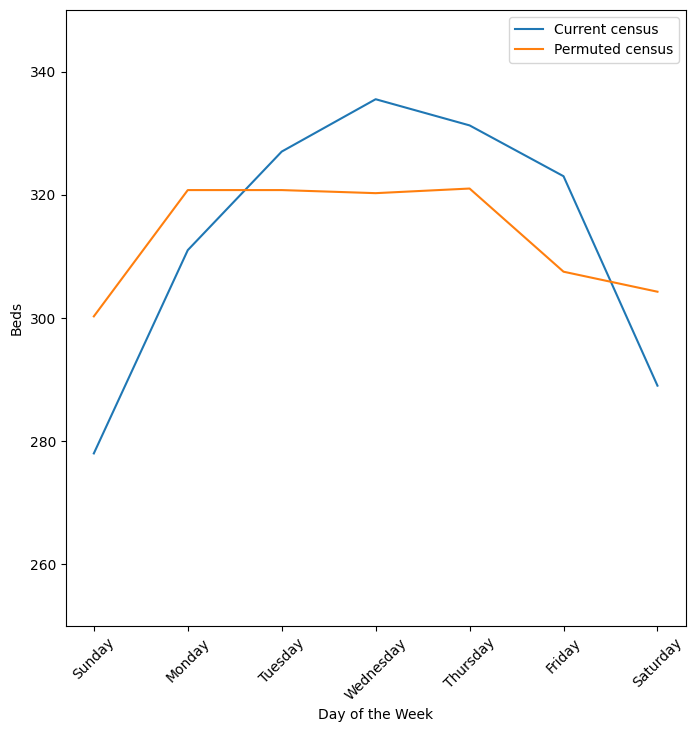

In [15]:
result = model.getResult()
result.plot()

In [16]:
result.save("result_P4_a0.csv")

In [21]:
df['Surgeon ID'].unique()

array([13, 42, 98, 12, 46, 85, 59, 84,  6, 80,  8, 41,  5, 63, 82,  0, 83,
       66, 11, 45, 94, 56, 40, 69, 90, 28, 61, 50, 72, 25, 29, 62, 87, 37,
       33, 76, 54, 75, 58, 15, 81, 86, 22, 79, 10, 35,  9, 43, 68, 31, 65,
       51, 24, 26, 52, 16, 71, 34, 18,  2, 48, 17, 27, 44, 49,  1,  3, 23,
       93, 92,  4, 21, 89, 96, 95, 97, 14, 32, 38, 20, 78, 67, 73, 91, 53,
       39,  7, 99, 55, 64, 60, 47, 57, 77, 74, 88, 19, 36, 30, 70])